In [13]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import itertools
import seaborn as sns
from progress.bar import Bar



In [14]:
#
# Attribute Information:
# 	 1.	lettr	capital letter	(26 values from A to Z)
# 	 2.	x-box	horizontal position of box	(integer)
# 	 3.	y-box	vertical position of box	(integer)
# 	 4.	width	width of box			(integer)
# 	 5.	high 	height of box			(integer)
# 	 6.	onpix	total # on pixels		(integer)
# 	 7.	x-bar	mean x of on pixels in box	(integer)
# 	 8.	y-bar	mean y of on pixels in box	(integer)
# 	 9.	x2bar	mean x variance			(integer)
# 	10.	y2bar	mean y variance			(integer)
# 	11.	xybar	mean x y correlation		(integer)
# 	12.	x2ybr	mean of x * x * y		(integer)
# 	13.	xy2br	mean of x * y * y		(integer)
# 	14.	x-ege	mean edge count left to right	(integer)
# 	15.	xegvy	correlation of x-ege with y	(integer)
# 	16.	y-ege	mean edge count bottom to top	(integer)
# 	17.	yegvx	correlation of y-ege with x	(integer)

In [15]:
letterData = pd.read_csv('data/letterrecognitiondatacsv.csv')

#[x-box, y-box, width, height, onpix, x-bar, y-bar, x2bar, y2bar, x2ybr, xy2br, x-edg, xedgvy, y-edg, yedgvx]
features = []
letters = []
dataframe = []

#get features and labels (letters) from dataset and get dataframe set up properly
for i in range(0, len(letterData)):
    temp = letterData.iloc[i, 0]
    temp = temp.split(';')
    newTemp = [int(temp[i]) for i in range(1, len(temp))]
    letter = temp[0]
    features.append(newTemp)
    letters.append(letter)
    tempDF = newTemp
    tempDF.insert(len(newTemp), temp[0])
    dataframe.append(tempDF)
print(dataframe[0])

df = pd.DataFrame(dataframe, columns=['x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-edge', 'yedgevx', 'letter'])

[5, 12, 3, 7, 2, 10, 5, 5, 4, 13, 3, 9, 2, 8, 4, 10, 'I']


In [16]:
#Checking if I set up the dataframe correctly
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    #print(df)
    pass

In [17]:
xbox = df['x-box']
ybox = df['y-box']

#[x-box, y-box, width, height, onpix, x-bar, y-bar, x2bar, y2bar, x2ybr, xy2br, x-edg, xedgvy, y-edg, yedgvx]
print(np.corrcoef(xbox, ybox))

## First we find the features with the greatest average intra class distances. Since we have 26 different lables, great
# variation could indicate a good descriptor, as small distances could indicate a universal descriptor for all letters
def getIntraClassDistance(featureList):
    diff = []

    for a, b in itertools.combinations(featureList, 2):
        diffVar = abs(b - a)
        diff.append(diffVar)

    avgDistance = np.average(diff)

    return avgDistance

intraDistances = []
for i in range(0, 16):
    feature = df.iloc[:, i]
    dist = getIntraClassDistance(feature)
    intraDistances.append(dist)

print(intraDistances)
xlabels = ['x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-edge', 'xedgevy', 'y-edge', 'yedgevx']



[[1.         0.75783104]
 [0.75783104 1.        ]]
[2.0925797064930753, 3.730329980845477, 2.230432273688892, 2.5346145495093535, 2.376646205047526, 2.156087772385419, 2.4881784243227565, 2.8779833231085497, 2.6597543598552065, 2.736447373423777, 2.8758669956700156, 2.23187336984611, 2.5016867305011417, 1.6641325715650719, 2.8901267645640507, 1.7144119532209234]


16
16
16


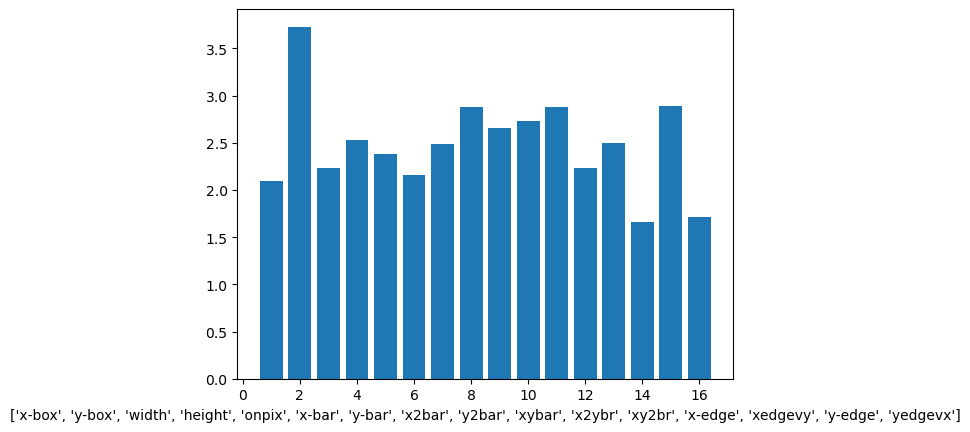

In [22]:
xcoord = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15, 16]
print(len(xlabels))
print(len(xcoord))
print(len(intraDistances))
plt.bar(xcoord, intraDistances)
plt.xlabel(xlabels)
plt.show()

# There seems a relatively big average intra class distance between feature values for feature 'y-box'. ...
#.. ^this could indicate that the feature 'y-box' is more different for each letter than other features...
#.. it could also just be because there generally is a larger spread.
# A small average intra class distance for feature 'xedgevy' and 'yedgevx' indicate that they are not...
#..descriptive of individual letters.
# However, considering that there are 26 different labels (letters), the overall low average distances are quite alarming...
#.. Dimensionality reduction might be difficult, but a correlation matrix should reveal more information about the features.

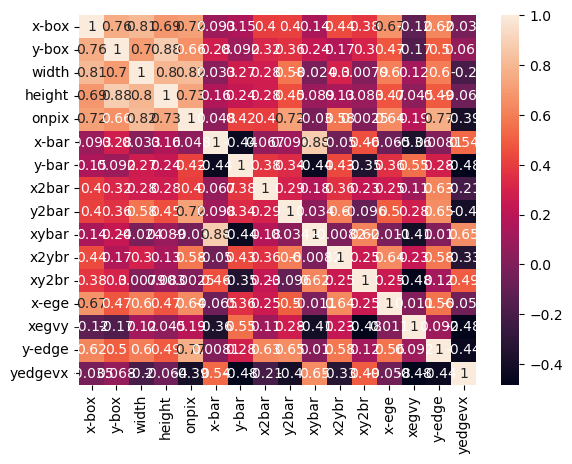

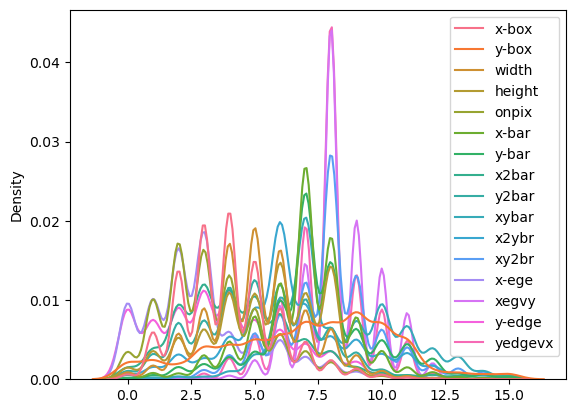

In [28]:
## We will now take a look at the 'y-box' feature for each letter.
gDF = df.groupby('letter')
sortedletterDF = [gDF.get_group(x) for x in gDF.groups]

aDF = sortedletterDF[0]
correaMAT = aDF.corr()
sns.heatmap(correaMAT, annot=True)
plt.show()

sns.kdeplot(data=df)
plt.show()


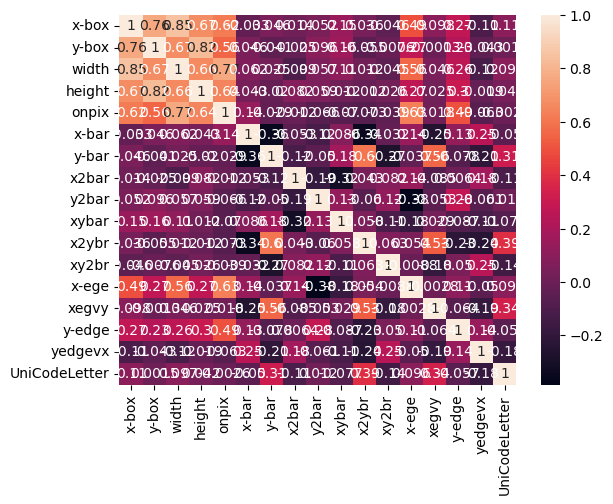

In [26]:
# I want to to check for correalations between feature values and their respective labels.
# First we need to map the letter to numbers, so they can be plotted in the matrix

letterInt = []
for i in range(len(df.iloc[:, 16])):
    tempLetter = df.iloc[i, 16]
    letterInt.append(ord(tempLetter))

df2 = df.assign(UniCodeLetter=letterInt)

correaMAT = df2.corr()
#sns.heatmap(correaMAT, annot=True)
#plt.show()